## Análises COVID-19 

Serão analisadas as séries temporais sobre a contaminação do vírus COVID-19 pelo mundo.

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import plotly.express as px
import plotly.graph_objects as go

Agora, vamos analisar os dados. É importante já dizer no comando pd.read_csv quais são as colunas que serão "parseadas" como datas. O pandas
possui métodos robustos para trabalhar com esse tipo de informação.

In [2]:


# Carregar o arquivo CSV
caminho_arquivo = 'covid_19_data.csv'
df = pd.read_csv(caminho_arquivo, parse_dates=['ObservationDate'])

# Converter apenas os valores que não estão no formato correto
df['Last Update'] = df['Last Update'].apply(lambda x: pd.to_datetime(x) if isinstance(x, str) else x)

# Exibir o DataFrame atualizado
df


,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,2020-01-22,Anhui,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0
1,2,2020-01-22,Beijing,Mainland China,2020-01-22 17:00:00,14.0,0.0,0.0
2,3,2020-01-22,Chongqing,Mainland China,2020-01-22 17:00:00,6.0,0.0,0.0
3,4,2020-01-22,Fujian,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0
4,5,2020-01-22,Gansu,Mainland China,2020-01-22 17:00:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
26708,26709,2020-05-19,Wyoming,US,2020-05-20 02:32:19,776.0,10.0,0.0
26709,26710,2020-05-19,Xinjiang,Mainland China,2020-05-20 02:32:19,76.0,3.0,73.0
26710,26711,2020-05-19,Yukon,Canada,2020-05-20 02:32:19,11.0,0.0,11.0
26711,26712,2020-05-19,Yunnan,Mainland China,2020-05-20 02:32:19,185.0,2.0,183.0


In [3]:
# Conferir os tipos de cada coluna

df.dtypes

SNo                         int64
ObservationDate    datetime64[ns]
Province/State             object
Country/Region             object
Last Update        datetime64[ns]
Confirmed                 float64
Deaths                    float64
Recovered                 float64
dtype: object

Nomes de colunas não devem ter letras maiúsculas e nem caracteres especiais. Será implementada uma função para fazer a limpeza dos nomes
dessas colunas.

In [4]:
import re

def corrige_colunas(col_name):
    """
    Função para corrigir nomes de colunas removendo barras e espaços e convertendo para minúsculas.

    Args:
    col_name (str): Nome da coluna a ser corrigido.

    Returns:
    str: Nome da coluna corrigido, sem barras, espaços e em minúsculas.
    """
    # Substitui barras (/) e espaços por uma string vazia, e converte para minúsculas
    return re.sub(r"[/| ]", "", col_name).lower()



In [5]:
corrige_colunas("AdgE/P ou")        #teste

'adgepou'

In [6]:
# Corrigir todas as colunas do df

df.columns = [corrige_colunas(col) for col in df.columns]

In [7]:
df

,sno,observationdate,provincestate,countryregion,lastupdate,confirmed,deaths,recovered
0,1,2020-01-22,Anhui,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0
1,2,2020-01-22,Beijing,Mainland China,2020-01-22 17:00:00,14.0,0.0,0.0
2,3,2020-01-22,Chongqing,Mainland China,2020-01-22 17:00:00,6.0,0.0,0.0
3,4,2020-01-22,Fujian,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0
4,5,2020-01-22,Gansu,Mainland China,2020-01-22 17:00:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
26708,26709,2020-05-19,Wyoming,US,2020-05-20 02:32:19,776.0,10.0,0.0
26709,26710,2020-05-19,Xinjiang,Mainland China,2020-05-20 02:32:19,76.0,3.0,73.0
26710,26711,2020-05-19,Yukon,Canada,2020-05-20 02:32:19,11.0,0.0,11.0
26711,26712,2020-05-19,Yunnan,Mainland China,2020-05-20 02:32:19,185.0,2.0,183.0


## Brasil

Selecionar apenas os dados do Brasil para investigar

In [8]:
df.loc[df.countryregion == 'Brazil']

,sno,observationdate,provincestate,countryregion,lastupdate,confirmed,deaths,recovered
82,83,2020-01-23,NaN,Brazil,2020-01-23 17:00:00,0.0,0.0,0.0
2455,2456,2020-02-26,NaN,Brazil,2020-02-26 23:53:02,1.0,0.0,0.0
2559,2560,2020-02-27,NaN,Brazil,2020-02-26 23:53:02,1.0,0.0,0.0
2668,2669,2020-02-28,NaN,Brazil,2020-02-26 23:53:02,1.0,0.0,0.0
2776,2777,2020-02-29,NaN,Brazil,2020-02-29 21:03:05,2.0,0.0,0.0
...,...,...,...,...,...,...,...,...
24850,24851,2020-05-15,NaN,Brazil,2020-05-16 02:32:19,220291.0,14962.0,84970.0
25227,25228,2020-05-16,NaN,Brazil,2020-05-17 02:32:32,233511.0,15662.0,89672.0
25604,25605,2020-05-17,NaN,Brazil,2020-05-18 02:32:21,241080.0,16118.0,94122.0
25981,25982,2020-05-18,NaN,Brazil,2020-05-19 02:32:18,255368.0,16853.0,100459.0


In [9]:
brasil = df.loc[(df.countryregion == 'Brazil') & (df.confirmed > 0)]

In [10]:
brasil

,sno,observationdate,provincestate,countryregion,lastupdate,confirmed,deaths,recovered
2455,2456,2020-02-26,NaN,Brazil,2020-02-26 23:53:02,1.0,0.0,0.0
2559,2560,2020-02-27,NaN,Brazil,2020-02-26 23:53:02,1.0,0.0,0.0
2668,2669,2020-02-28,NaN,Brazil,2020-02-26 23:53:02,1.0,0.0,0.0
2776,2777,2020-02-29,NaN,Brazil,2020-02-29 21:03:05,2.0,0.0,0.0
2903,2904,2020-03-01,NaN,Brazil,2020-02-29 21:03:05,2.0,0.0,0.0
...,...,...,...,...,...,...,...,...
24850,24851,2020-05-15,NaN,Brazil,2020-05-16 02:32:19,220291.0,14962.0,84970.0
25227,25228,2020-05-16,NaN,Brazil,2020-05-17 02:32:32,233511.0,15662.0,89672.0
25604,25605,2020-05-17,NaN,Brazil,2020-05-18 02:32:21,241080.0,16118.0,94122.0
25981,25982,2020-05-18,NaN,Brazil,2020-05-19 02:32:18,255368.0,16853.0,100459.0


### Casos Confirmados

In [11]:
# Gráfico da evolução de casos confirmados

px.line(brasil, 'observationdate', 'confirmed', title= 'Casos Confirmados no Brasil')

### Novos Casos por Dia

In [12]:
# Técnica de Programação Funcional

# Cria uma nova coluna 'novoscasos' no DataFrame 'brasil'
brasil['novoscasos'] = list(map(
    # Define uma função lambda para calcular o número de novos casos
    lambda x: 0 if (x==0) else brasil['confirmed'].iloc[x] - brasil['confirmed'].iloc[x-1],
    # Cria um array com os índices das linhas do DataFrame 'brasil'
    np.arange(brasil.shape[0])
))



# Explicação:
# - np.arange(brasil.shape[0]) cria um array de índices que vai de 0 até o número de linhas do DataFrame 'brasil' - 1.
# - Para cada índice x, a função lambda calcula o número de novos casos:
#   - Se x é 0 (primeira linha), o valor é 0, pois não há um dia anterior para comparar.
#   - Para os demais índices, calcula a diferença entre o número de casos confirmados no dia x e no dia anterior (x-1).
# - map aplica a função lambda a cada índice do array gerado por np.arange.
# - list transforma o resultado de map em uma lista.
# - A lista resultante é atribuída à nova coluna 'novoscasos' no DataFrame 'brasil'.

/var/folders/zp/1hd6qt591tg4pc07xp859dw00000gp/T/ipykernel_8858/544469831.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [13]:
# Visualizando

px.line(brasil, x='observationdate', y='novoscasos', title='Novos casos por dia')

### Mortes

In [14]:
from bokeh.plotting import figure, show
from bokeh.models import ColumnDataSource, HoverTool
from bokeh.io import output_notebook

# Ordena os dados por data para garantir que o gráfico seja plotado corretamente
brasil_sorted = brasil.sort_values(by='observationdate')

# Cria uma fonte de dados para o Bokeh
source = ColumnDataSource(brasil_sorted)

# Configura a saída para o notebook (opcional, se estiver usando Jupyter Notebook)
output_notebook()

# Cria a figura Bokeh
p = figure(height=400, width=800, title='Mortes por COVID-19 no Brasil', x_axis_type='datetime')

# Adiciona uma linha ao gráfico
p.line(x='observationdate', y='deaths', source=source, line_width=2, line_color='red', legend_label='Mortes')

# Adiciona marcadores
p.circle(x='observationdate', y='deaths', source=source, size=8, fill_color='white', line_color='red', legend_label='Mortes')

# Adiciona ferramenta de hover para exibir informações ao passar o mouse
hover = HoverTool(tooltips=[('Data', '@observationdate{%F}'), ('Mortes', '@deaths')],
                formatters={'@observationdate': 'datetime'}, mode='vline')
p.add_tools(hover)

# Configurações de layout
p.legend.location = 'top_left'
p.xaxis.axis_label = 'Data de Observação'
p.yaxis.axis_label = 'Número de Mortes'

# Exibe o gráfico
show(p)


Loading BokehJS ...

### Taxa de Crescimento

taxa_crescimento = (presente/passado)ˆ(1/n) - 1

In [15]:
def taxa_crescimento(data, variable, data_inicio=None, data_fim=None):
    # Se data início for None, define como a primeira data disponível
    if data_inicio is None:
        data_inicio = data.observationdate.loc[data[variable] > 0].min()
    else:
        data_inicio = pd.to_datetime(data_inicio)

    if data_fim is None:
        data_fim = data.observationdate.iloc[-1]
    else:
        data_fim = pd.to_datetime(data_fim)

    # Define os valores do presente e passado
    passado = data.loc[data.observationdate == data_inicio, variable].values[0]
    presente = data.loc[data.observationdate == data_fim, variable].values[0]

    # Define o número de pontos no tempo que vamos avaliar
    n = (data_fim - data_inicio).days

    # Calcular a taxa
    taxa = (presente / passado) ** (1 / n) - 1

    return taxa * 100



In [16]:
# Taxa de crescimento médio do COVID no Brasil em todo o período

taxa = taxa_crescimento(brasil, 'confirmed') 

print(f'A Taxa de Crescimento do COVID no Brasil é de {taxa: .2f}%')

A Taxa de Crescimento do COVID no Brasil é de  16.27%


In [17]:
def taxa_crescimento_diaria(data, variable, data_inicio=None):
    # Se data início for None, define como a primeira data disponível
    if data_inicio is None:
        data_inicio = data.observationdate.loc[data[variable] > 0].min()
    else:
        data_inicio = pd.to_datetime(data_inicio)

    data_fim = data.observationdate.max()

    # Define o número de pontos no tempo que vamos avaliar
    n = (data_fim - data_inicio).days

    
    # Taxa calculada de um dia para o outro
    taxas = list(map(lambda x: (data[variable].iloc[x] - data[variable].iloc[x - 1]) / data[variable].iloc[x - 1], range(1, n+1)))

    return np.array(taxas) * 100





In [18]:
tx_dia = taxa_crescimento_diaria(brasil, 'confirmed')

In [19]:
tx_dia

array([  0.        ,   0.        , 100.        ,   0.        ,
         0.        ,   0.        , 100.        ,   0.        ,
       225.        ,   0.        ,  53.84615385,  25.        ,
        24.        ,  22.58064516,  36.84210526, 190.38461538,
         0.        ,   7.28476821,  23.45679012,  60.5       ,
        15.88785047,  66.93548387,  27.69726248,  28.75157629,
        51.4201763 ,  24.45019405,  16.78794179,  13.66266133,
        16.87548943,  14.47236181,  14.25226807,   9.01639344,
         7.58928571,  24.8525879 ,  19.57320273,  17.67115272,
        12.58080557,  14.39929329,   7.43243243,   9.26325247,
        15.40169394,  15.22017956,  11.88620903,   8.54521335,
         5.54537122,   7.06807546,   5.57858688,   7.81903542,
        12.10513815,   7.4329096 ,  10.70501233,   8.83557983,
         5.44492335,   5.4043566 ,   5.73350023,   6.21648599,
         9.35157462,   8.00823407,   9.77184834,   6.36504619,
         6.88748019,   8.58316283,   8.80726429,   9.41

In [20]:
primeiro_dia = brasil.observationdate.loc[brasil.confirmed > 0].min()

px.line(x=pd.date_range(primeiro_dia, brasil.observationdate.max())[1:], y=tx_dia, title='Taxa de Crescimento de Casos Confirmados no Brasil')

## Predições

Antes de modelar uma série temporal deve-se decompor, pois é necessário entender o que ela tem de tendência, sazonalidade e ruído.

In [21]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

In [22]:
confirmados = brasil.confirmed
confirmados.index = brasil.observationdate
confirmados

observationdate
2020-02-26         1.0
2020-02-27         1.0
2020-02-28         1.0
2020-02-29         2.0
2020-03-01         2.0
                ...   
2020-05-15    220291.0
2020-05-16    233511.0
2020-05-17    241080.0
2020-05-18    255368.0
2020-05-19    271885.0
Name: confirmed, Length: 84, dtype: float64

In [23]:
# Decomposição

res = seasonal_decompose(confirmados)

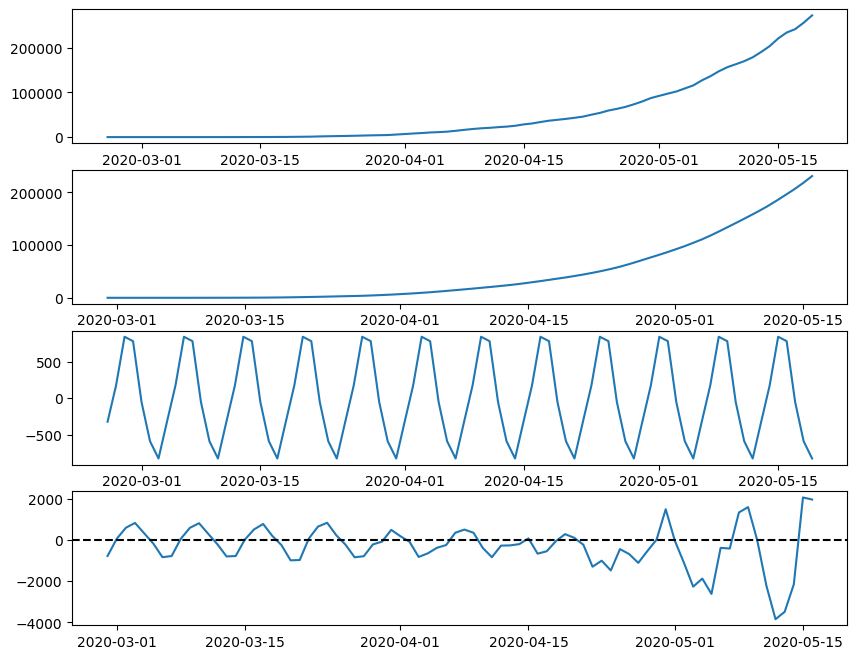

In [24]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(10, 8))

# Plota os dados observados (observações originais da série temporal)
ax1.plot(res.observed)                             

# Plota a tendência da série temporal (parte suave que captura o movimento de longo prazo)
ax2.plot(res.trend)                                 

# Plota a sazonalidade da série temporal (padrões repetitivos que ocorrem em intervalos fixos)
ax3.plot(res.seasonal)                              

# Plota os resíduos da série temporal (parte restante após a remoção da tendência e sazonalidade)
ax4.plot(confirmados.index, res.resid)             

# Adiciona uma linha horizontal pontilhada na posição zero no gráfico dos resíduos para referência visual
ax4.axhline(0, linestyle='dashed', c='black')


plt.show()


# ARIMA 

ARIMA (Autoregressive Integrated Moving Average) - Média Móvel Integrada Autoregressiva - é um modelo estatístico usado para analisar e prever séries temporais. Ele combina três componentes principais:

1. **Autoregressivo (AR)**: A parte autoregressiva do modelo usa a relação entre uma observação e várias observações anteriores (lags) para modelar a série temporal.
   
2. **Integração (I)**: A parte de integração envolve a diferenciação da série temporal para torná-la estacionária, removendo tendências ou sazonalidades.
   
3. **Média Móvel (MA)**: A parte de média móvel modela a relação entre uma observação e um erro residual de um modelo de média móvel aplicado a observações anteriores.

### Componentes do Modelo ARIMA

- **AR(p)**: Representa a ordem do componente autoregressivo, onde `p` é o número de lags a serem utilizados.
- **I(d)**: Representa o número de diferenciações necessárias para tornar a série estacionária, onde `d` é o grau de diferenciação.
- **MA(q)**: Representa a ordem do componente de média móvel, onde `q` é o número de lags dos erros passados a serem utilizados.

### Como Funciona?

1. **Identificação**: Determinar os valores adequados para os parâmetros `p`, `d` e `q`. Isso pode ser feito através da análise da função de autocorrelação (ACF) e da função de autocorrelação parcial (PACF).
2. **Estimação**: Estimar os parâmetros do modelo utilizando métodos de máxima verossimilhança ou outros métodos de estimação.
3. **Diagnóstico**: Avaliar a adequação do modelo verificando os resíduos. Os resíduos devem se comportar como um ruído branco, sem padrões evidentes.
4. **Previsão**: Utilizar o modelo ajustado para fazer previsões futuras da série temporal.

### Vantagens do ARIMA

- Flexível e pode ser aplicado a diversas séries temporais.
- Bom desempenho em séries temporais com dependência temporal e padrões de curto prazo.

### Limitações do ARIMA

- Requer que a série temporal seja estacionária (ou seja, não deve ter tendências ou sazonalidades).
- Pode não capturar bem padrões de longo prazo ou sazonalidades complexas.


In [25]:
from pmdarima.arima import auto_arima           #Ajustar automáticamente a melhor modelagem que a função encontrar

modelo = auto_arima(confirmados)

In [26]:
import plotly.graph_objects as go
import pandas as pd

# Cria a figura
fig = go.Figure()

# Adiciona a série temporal observada
fig.add_trace(go.Scatter(
    x=confirmados.index, y=confirmados, name='Observados'
))

# Adiciona a previsão dentro do intervalo de amostra
fig.add_trace(go.Scatter(
    x=confirmados.index, y=modelo.predict_in_sample(), name='Preditos'
))

# Adiciona a previsão futura
fig.add_trace(go.Scatter(
    x=pd.date_range('2020-05-20', '2020-06-20'), y=modelo.predict(31), name='Forecast'
))

# Atualiza o layout do gráfico
fig.update_layout(title='Previsão de Casos Confirmados no Brasil para os Próximos 30 Dias')


fig.show()


## Modelo de Crescimento


O objetivo deste modelo é prever quando a curva de crescimento dos casos de COVID-19 vai começar a achatar. Para isso, utilizaremos a biblioteca **fbprophet**.

A biblioteca **fbprophet**, desenvolvida pelo Facebook, é uma poderosa ferramenta para a modelagem de séries temporais, especialmente projetada para lidar com dados que possuem sazonalidade, feriados e tendências de longo prazo. Ela é amplamente utilizada para previsões em diversos domínios, incluindo a previsão de vendas, tráfego de sites e, neste caso, a previsão de casos de COVID-19.

Este modelo nos permitirá identificar o ponto em que o crescimento dos casos confirmados começará a desacelerar, proporcionando insights valiosos para a tomada de decisões e implementação de medidas de controle.

### O que significa achatar a curva?

Achatar a curva refere-se à desaceleração do crescimento do número de casos novos de uma doença, de modo que o número total de casos ativos em qualquer momento não ultrapasse a capacidade do sistema de saúde. Visualmente, isso se traduz em uma curva de crescimento que passa de uma trajetória exponencial para uma mais linear ou estável. Achatar a curva é crucial para garantir que hospitais e serviços de saúde possam atender todos os pacientes, evitando a sobrecarga e, assim, reduzindo a mortalidade e melhorando o atendimento.

In [30]:
from prophet import Prophet

19:08:56 - cmdstanpy - INFO - Chain [1] start processing


19:08:56 - cmdstanpy - INFO - Chain [1] done processing
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/prophet/plot.py:72: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/prophet/plot.py:73: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



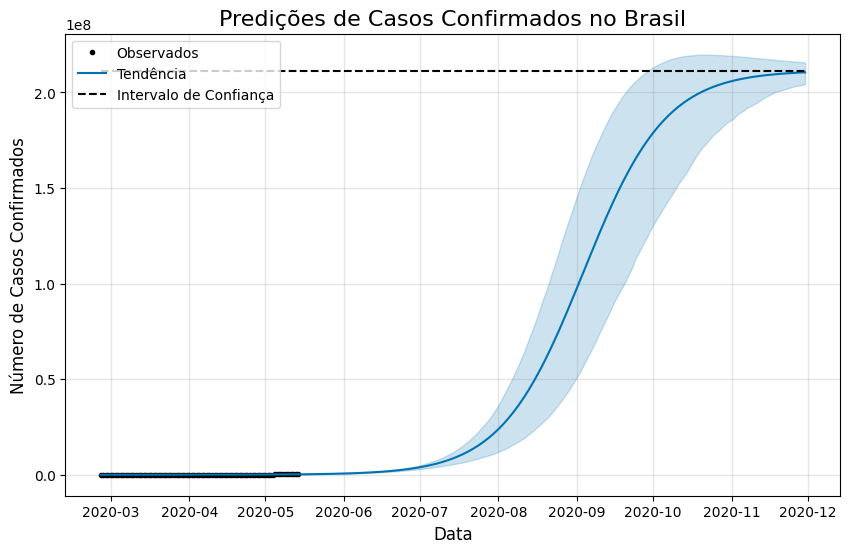

In [37]:
from prophet import Prophet

# Pré-processamentos
train = confirmados.reset_index()[:-5]
test = confirmados.reset_index()[-5:]

# Renomeando Colunas
train.rename(columns={'observationdate': 'ds', 'confirmed': 'y'}, inplace=True)
test.rename(columns={'observationdate': 'ds', 'confirmed': 'y'}, inplace=True)

# Definir o Modelo de Crescimento
profeta = Prophet(growth='logistic', changepoints=['2020-03-21', '2020-03-30', '2020-04-25', '2020-05-03', '2020-05-10'])

pop = 211463156  # população brasileira
train['cap'] = pop

# Ajustar o modelo (treina o modelo)
profeta.fit(train)

# Construir Previsões para o Futuro
future_dates = profeta.make_future_dataframe(periods=200)
future_dates['cap'] = pop
forecast = profeta.predict(future_dates)

# Visualizar as previsões
fig, ax = plt.subplots(figsize=(10, 6))
fig = profeta.plot(forecast, ax=ax)
ax.set_title('Predições de Casos Confirmados no Brasil', fontsize=16)
ax.set_xlabel('Data', fontsize=12)
ax.set_ylabel('Número de Casos Confirmados', fontsize=12)
ax.legend(['Observados', 'Tendência', 'Intervalo de Confiança'], loc='upper left')

plt.show()


In [38]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=forecast.ds, y=forecast.yhat, name='Predição'))
fig.add_trace(go.Scatter(x=train.ds, y=train.y, name='Observados - Treino'))
fig.update_layout(title='Predições de Casos Confirmados no Brasil')
fig.show()